In [24]:
# first run feature_extraction.ipynb
# then run this notebook 

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import os
import collections
import cv2

In [20]:
images_path = '../practical_stuff/all_images/'
labels_path = '../practical_stuff/labels.txt'

In [21]:
# read images information
# work on the first 500 records
labels = pd.read_csv(labels_path, sep = ',', header = None, names = ['class','image'])
labels = labels.reset_index()
#labels = labels[:500]

In [22]:
labels.head()

,index,class,image
0,0,other,2378600.jpeg
1,1,other,2378687.jpeg
2,2,other,2379071.jpeg
3,3,other,2379113.jpeg
4,4,other,2379591.jpeg


In [2]:
# load features and labels for training 
X = np.load('../features.npy')
y = np.load('../targets.npy')

In [3]:
X.shape

(3119, 25088)

In [4]:
# k means clustering on the image features 
kmeans = KMeans(n_clusters =10)
#fitting the input features
clustered_features = kmeans.fit(X)

In [5]:
# getting the cluster labels 
cluster_labels = kmeans.predict(X)

array([2, 7, 0, ..., 5, 2, 9], dtype=int32)

In [9]:
cluster_labels

array([2, 7, 0, ..., 5, 2, 9], dtype=int32)

In [16]:
arranged_clusters = np.argsort(cluster_labels)
arranged_clusters

array([2046, 2704, 1672, ..., 1252, 1093, 3118])

In [17]:
# to see cluster counts
collections.Counter(cluster_labels)

Counter({0: 614,
         1: 1,
         2: 507,
         3: 267,
         4: 273,
         5: 362,
         6: 25,
         7: 417,
         8: 430,
         9: 223})

In [28]:
# disply similar images
def display_images():
    width, height = 20, 20
    fig = plt.figure(figsize=(width,height))
    columns = 40
    rows = 20

    for i, index in enumerate(arranged_clusters[:columns*rows]):
        #img = np.random.randint(10, size =(height,width))
        img_path = os.path.join(images_path + labels.ix[index]['image'].strip())
        img = cv2.imread(img_path)
        img = cv2.resize(img, (width,height))
        fig.add_subplot(rows, columns, i+1)
        plt.title(cluster_labels[index], fontsize = 5)
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])
        plt.imshow(img)
    plt.subplots_adjust(wspace = 0, hspace =0)
    plt.show()

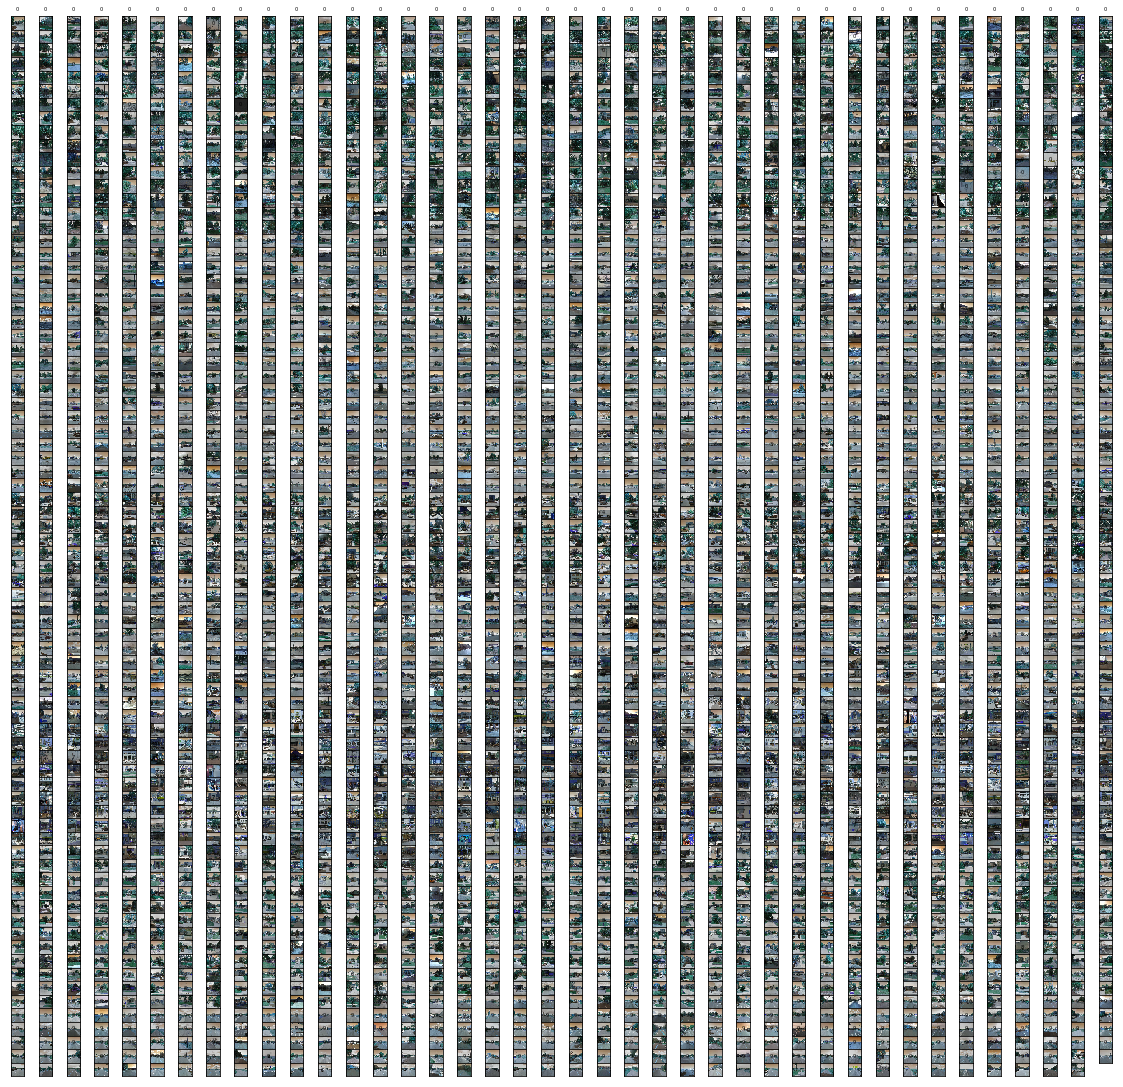

In [29]:
display_images()